# **TASK 1**

In [ ]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from matplotlib.pyplot import plot, show, draw, figure, cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report

## DATA 1

In [ ]:
df = pd.read_csv('Data1.csv') #reading Data1

In [ ]:
df = df.drop("Unnamed: 0",axis=1) #dropping unwanted column

In [ ]:
df

X1        X2        X3  Class
0   -0.063274  0.027734  0.022683      1
1   -0.000731  0.048211  0.069198      1
2   -0.060767 -0.009080  0.053085      1
3    0.013252 -0.011876  0.055324      1
4   -0.054508 -0.003813  0.001738      1
..        ...       ...       ...    ...
207  0.175738 -0.053478 -2.733752      7
208  0.396046 -0.858377 -3.126866      7
209 -0.406362 -0.334541 -2.885598      7
210 -0.299275  0.071281 -3.642585      7
211 -0.506192  0.433538 -2.608597      7

[212 rows x 4 columns]

In [ ]:
#Mapping data value and creating a new dataframes based on the class values
data1 = df[df.Class==1]
data2 = df[df.Class==2]
data3 = df[df.Class==3]
data4 = df[df.Class==4]
data5 = df[df.Class==5]
data6 = df[df.Class==6]
data7 = df[df.Class==7]

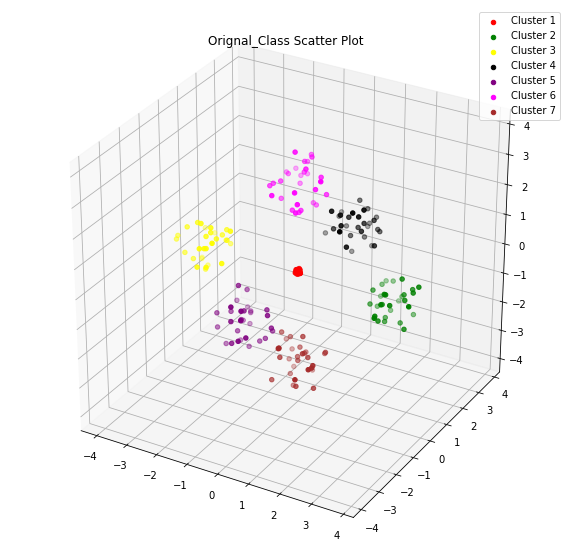

In [ ]:
#Plotting Orignal Class Scatter Plot
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, data1.X3, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1,data2.X2,data2.X3,c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.X1,data3.X2,data3.X3,c ='yellow', label = 'Cluster 3')
kplot.scatter3D(data4.X1,data4.X2,data4.X3,c ='black', label = 'Cluster 4')
kplot.scatter3D(data5.X1,data5.X2,data5.X3,c ='purple', label = 'Cluster 5')
kplot.scatter3D(data6.X1,data6.X2,data6.X3,c ='magenta', label = 'Cluster 6')
kplot.scatter3D(data7.X1,data7.X2,data7.X3,c ='brown', label = 'Cluster 7')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Orignal_Class Scatter Plot")
plt.show()

In [ ]:
#Kmeans clustering code
values = df[['X1','X2','X3' ]].values
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(values) 
    wcss.append(kmeans.inertia_)

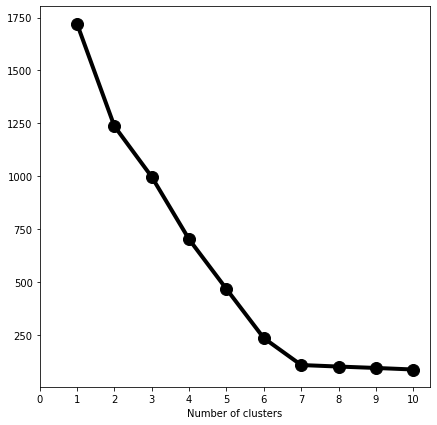

In [ ]:
#Finding the number of Clusters 
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),wcss, linewidth=4, markersize=12,marker='o',color = 'black')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("")
plt.show()
#Here we can see that the elbow is at 7

In [ ]:
# finding the clusters based on input matrix "values"
model = KMeans(n_clusters = 7, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y = model.fit_predict(values)
print(y)
y.shape

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


(212,)

In [ ]:
#Storing the Clusters to a new column
df['Kmeans_Cluster'] = y

In [ ]:
#Mapping data value and creating a new dataframes based on the cluster values
data1 = df[df.Kmeans_Cluster==0]
data2 = df[df.Kmeans_Cluster==1]
data3 = df[df.Kmeans_Cluster==2]
data4 = df[df.Kmeans_Cluster==3]
data5 = df[df.Kmeans_Cluster==4]
data6 = df[df.Kmeans_Cluster==5]
data7 = df[df.Kmeans_Cluster==6]

In [ ]:
#Kmeans Cluster Scatter Plot
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, data1.X3, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1,data2.X2,data2.X3,c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.X1,data3.X2,data3.X3,c ='yellow', label = 'Cluster 3')
kplot.scatter3D(data4.X1,data4.X2,data4.X3,c ='black', label = 'Cluster 4')
kplot.scatter3D(data5.X1,data5.X2,data5.X3,c ='purple', label = 'Cluster 5')
kplot.scatter3D(data6.X1,data6.X2,data6.X3,c ='magenta', label = 'Cluster 6')
kplot.scatter3D(data7.X1,data7.X2,data7.X3,c ='brown', label = 'Cluster 7')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Kmeans_Cluster Scatter Plot")
plt.show()

In [ ]:
#Masking the output cluster to avoide mismatching
from scipy.stats import mode 
labels = np.zeros_like(y)
for i in range(7):
    mask = (y == i)
    labels[mask] = mode(df.Class[mask])[0]

In [ ]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int32)

In [ ]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(df.Class, labels)

1.0

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(df.Class, labels))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [ ]:
df

X1        X2        X3  Class  Kmeans_Cluster
0   -0.063274  0.027734  0.022683      1               3
1   -0.000731  0.048211  0.069198      1               3
2   -0.060767 -0.009080  0.053085      1               3
3    0.013252 -0.011876  0.055324      1               3
4   -0.054508 -0.003813  0.001738      1               3
..        ...       ...       ...    ...             ...
207  0.175738 -0.053478 -2.733752      7               1
208  0.396046 -0.858377 -3.126866      7               1
209 -0.406362 -0.334541 -2.885598      7               1
210 -0.299275  0.071281 -3.642585      7               1
211 -0.506192  0.433538 -2.608597      7               1

[212 rows x 5 columns]

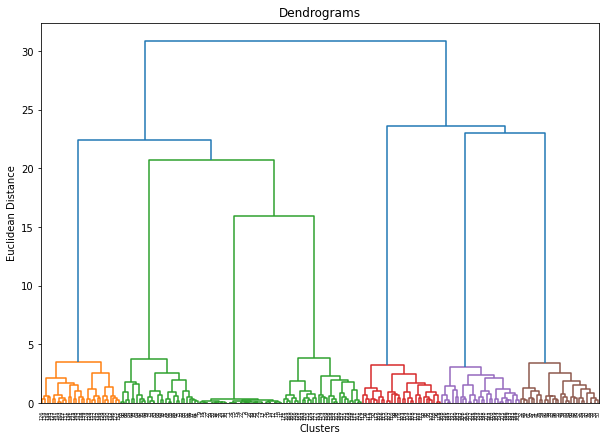

In [ ]:
#Hierarchial Plotting
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import cut_tree
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df.iloc[:,0:3], method='ward'))
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
hierarchial_clusters = cluster.fit_predict(df.iloc[:,0:3])
hierarchial_clusters

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
df['Predicted_class_byHierarchial'] = hierarchial_clusters
df

X1        X2        X3  Class  Kmeans_Cluster  \
0   -0.063274  0.027734  0.022683      1               3   
1   -0.000731  0.048211  0.069198      1               3   
2   -0.060767 -0.009080  0.053085      1               3   
3    0.013252 -0.011876  0.055324      1               3   
4   -0.054508 -0.003813  0.001738      1               3   
..        ...       ...       ...    ...             ...   
207  0.175738 -0.053478 -2.733752      7               1   
208  0.396046 -0.858377 -3.126866      7               1   
209 -0.406362 -0.334541 -2.885598      7               1   
210 -0.299275  0.071281 -3.642585      7               1   
211 -0.506192  0.433538 -2.608597      7               1   

     Predicted_class_byHierarchial  
0                                6  
1                                6  
2                                6  
3                                6  
4                                6  
..                             ...  
207                              3  
208                              3  
209                              3  
210                              3  
211                              3  

[212 rows x 6 columns]

In [ ]:
data1 = df[df.Predicted_class_byHierarchial==0]
data2 = df[df.Predicted_class_byHierarchial==1]
data3 = df[df.Predicted_class_byHierarchial==2]
data4 = df[df.Predicted_class_byHierarchial==3]
data5 = df[df.Predicted_class_byHierarchial==4]
data6 = df[df.Predicted_class_byHierarchial==5]
data7 = df[df.Predicted_class_byHierarchial==6]

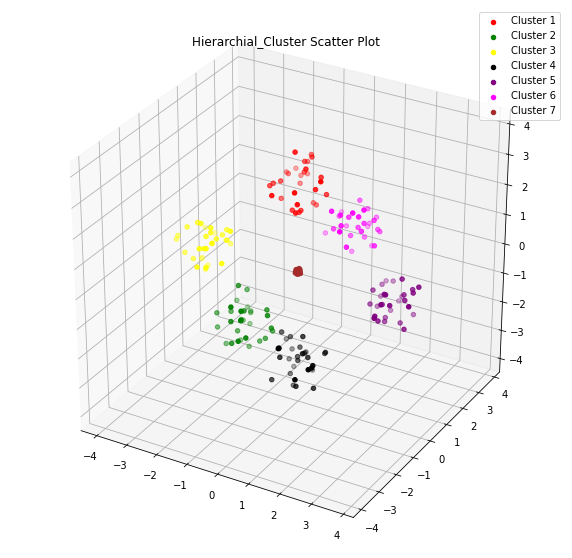

In [ ]:
#Plotting Hierarchial scatter plot
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, data1.X3, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1,data2.X2,data2.X3,c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.X1,data3.X2,data3.X3,c ='yellow', label = 'Cluster 3')
kplot.scatter3D(data4.X1,data4.X2,data4.X3,c ='black', label = 'Cluster 4')
kplot.scatter3D(data5.X1,data5.X2,data5.X3,c ='purple', label = 'Cluster 5')
kplot.scatter3D(data6.X1,data6.X2,data6.X3,c ='magenta', label = 'Cluster 6')
kplot.scatter3D(data7.X1,data7.X2,data7.X3,c ='brown', label = 'Cluster 7')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Hierarchial_Cluster Scatter Plot")
plt.show()

In [ ]:
#Masking the output cluster to avoide mismatching
from scipy.stats import mode 
labels = np.zeros_like(hierarchial_clusters)
for i in range(7):
    mask = (y == i)
    labels[mask] = mode(df.Class[mask])[0]

In [ ]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(df.Class,labels)

array([[32,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0, 30]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df.Class, labels)

1.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df.Class, labels))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



##DATA 2

In [ ]:
df = pd.read_csv('Data2.csv') #reading Data2

In [ ]:
df

Unnamed: 0         X         Y         C  Class
0           X1  3.277701  0.814082  0.326574      1
1           X2  0.387577  0.176780  0.888046      1
2           X3  0.268546  0.582963  0.080981      1
3           X4  2.031145  0.244597  0.643921      1
4           X5  0.188677  0.461280  0.496633      1
..         ...       ...       ...       ...    ...
399       X400  3.248655  2.297291  3.388138      3
400          X  4.100000  5.100000  0.504558      4
401        X.1  3.900000  4.900000  0.941634      4
402        X.2  4.000000  5.000000  0.702123      4
403        X.3  4.100000  5.100000  0.887645      4

[404 rows x 5 columns]

In [ ]:
df = df.drop("Unnamed: 0",axis=1)#dropping unwanted column

In [ ]:
df

X         Y         C  Class
0    3.277701  0.814082  0.326574      1
1    0.387577  0.176780  0.888046      1
2    0.268546  0.582963  0.080981      1
3    2.031145  0.244597  0.643921      1
4    0.188677  0.461280  0.496633      1
..        ...       ...       ...    ...
399  3.248655  2.297291  3.388138      3
400  4.100000  5.100000  0.504558      4
401  3.900000  4.900000  0.941634      4
402  4.000000  5.000000  0.702123      4
403  4.100000  5.100000  0.887645      4

[404 rows x 4 columns]

In [ ]:
#Mapping data value and creating a new dataframes based on the class values
data1 = df[df.Class==1]
data2 = df[df.Class==2]
data3 = df[df.Class==3]
data4 = df[df.Class==4]

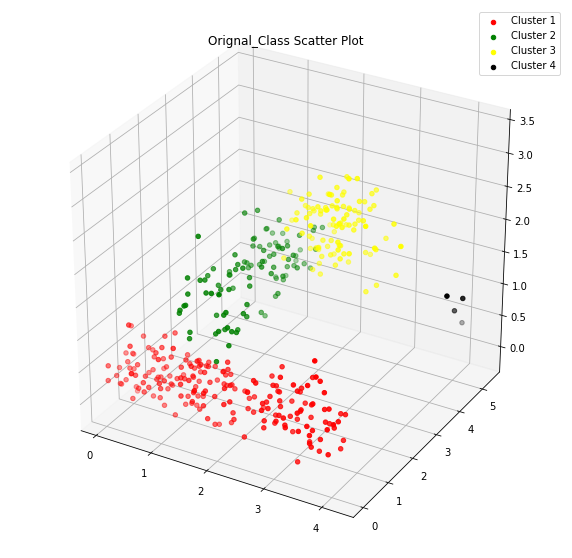

In [ ]:
#Plotting Orignal Class Scatter Plot
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X, data1.Y, data1.C, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X,data2.Y,data2.C,c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.X,data3.Y,data3.C,c ='yellow', label = 'Cluster 3')
kplot.scatter3D(data4.X,data4.Y,data4.C,c ='black', label = 'Cluster 4')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Orignal_Class Scatter Plot")
plt.show()

In [ ]:
#Kmeans clustering code

values = df[['X','Y','C' ]].values

wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(values) 
    wcss.append(kmeans.inertia_)

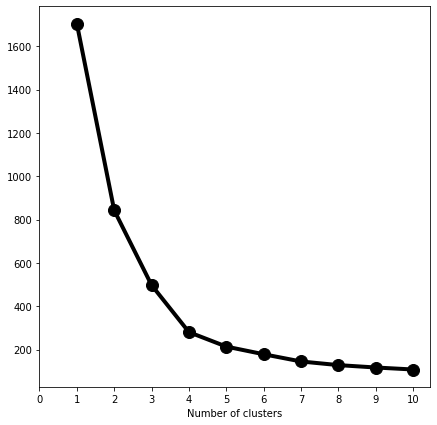

In [ ]:
#Finding the number of Clusters 

fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),wcss, linewidth=4, markersize=12,marker='o',color = 'black')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("")
plt.show()
#Here we can see that the elbow is at 4

In [ ]:
# finding the clusters based on input matrix "values"
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y = model.fit_predict(values)
print(y)
y.shape

[0 2 2 0 2 0 0 0 0 2 2 0 0 2 2 0 2 2 2 2 2 0 2 2 2 2 0 0 0 0 0 0 2 0 0 0 2
 2 0 2 0 2 2 0 2 2 2 0 0 0 2 0 0 2 2 0 2 0 2 2 0 2 0 2 0 2 2 2 2 2 2 2 2 0
 2 0 0 2 2 2 0 2 2 2 0 0 0 2 0 2 2 0 2 2 2 0 2 2 0 0 0 0 2 0 2 0 2 2 0 0 2
 2 2 0 2 2 2 0 2 2 0 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 0 0 0 2 2 0 0 2 2 0
 0 2 0 0 2 2 2 2 2 0 2 2 2 2 2 0 0 2 0 0 0 2 2 0 2 2 0 2 2 0 0 2 0 0 2 0 2
 0 2 2 2 2 0 0 2 2 2 0 2 2 0 2 3 3 3 3 2 3 2 3 3 3 3 2 3 3 3 3 3 2 3 3 2 3
 3 3 3 3 3 3 2 3 3 2 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 2
 3 2 2 3 3 3 2 2 2 3 2 3 3 2 3 3 3 3 2 3 3 3 2 2 3 3 3 2 3 3 3 3 3 3 2 3 3
 3 2 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3]


(404,)

In [ ]:
df['Kmeans_Clusters'] = y #Storing the Clusters to a new column


In [ ]:
#Mapping data value and creating a new dataframes based on the cluster values
data1 = df[df.Kmeans_Clusters==0]
data2 = df[df.Kmeans_Clusters==1]
data3 = df[df.Kmeans_Clusters==2]
data4 = df[df.Kmeans_Clusters==3]

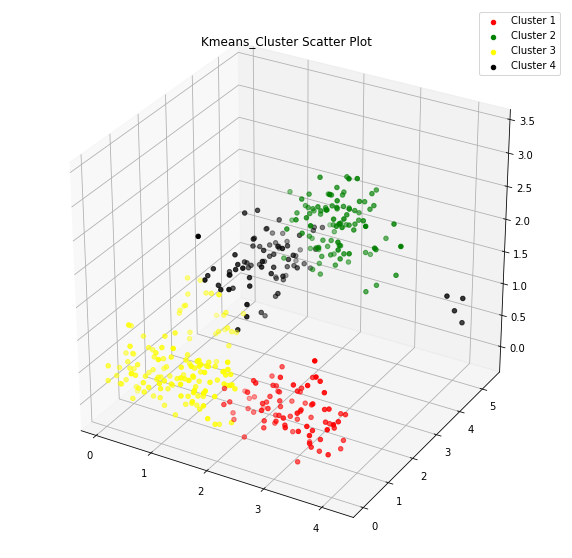

In [ ]:
#Kmeans Cluster Scatter Plot
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X, data1.Y, data1.C, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X,data2.Y,data2.C,c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.X,data3.Y,data3.C,c ='yellow', label = 'Cluster 3')
kplot.scatter3D(data4.X,data4.Y,data4.C,c ='black', label = 'Cluster 4')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Kmeans_Cluster Scatter Plot")
plt.show()

In [ ]:
#Masking the output cluster to avoide mismatching

from scipy.stats import mode 
labels = np.zeros_like(y)
for i in range(4):
    mask = (y == i)
    labels[mask] = mode(df.Class[mask])[0]

In [ ]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 3,

In [ ]:
df.Class

0      1
1      1
2      1
3      1
4      1
      ..
399    3
400    4
401    4
402    4
403    4
Name: Class, Length: 404, dtype: int64

In [ ]:
#Accuracy calculations
from sklearn.metrics import accuracy_score
accuracy_score(df.Class, labels)

0.9306930693069307

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(df.Class,labels)

array([[200,   0,   0],
       [ 24,  76,   0],
       [  0,   0, 100],
       [  0,   4,   0]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df.Class, labels, zero_division=0))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94       200
           2       0.95      0.76      0.84       100
           3       1.00      1.00      1.00       100
           4       0.00      0.00      0.00         4

    accuracy                           0.93       404
   macro avg       0.71      0.69      0.70       404
weighted avg       0.92      0.93      0.92       404



In [ ]:
df

X         Y         C  Class  Kmeans_Clusters
0    3.277701  0.814082  0.326574      1                0
1    0.387577  0.176780  0.888046      1                2
2    0.268546  0.582963  0.080981      1                2
3    2.031145  0.244597  0.643921      1                0
4    0.188677  0.461280  0.496633      1                2
..        ...       ...       ...    ...              ...
399  3.248655  2.297291  3.388138      3                1
400  4.100000  5.100000  0.504558      4                3
401  3.900000  4.900000  0.941634      4                3
402  4.000000  5.000000  0.702123      4                3
403  4.100000  5.100000  0.887645      4                3

[404 rows x 5 columns]

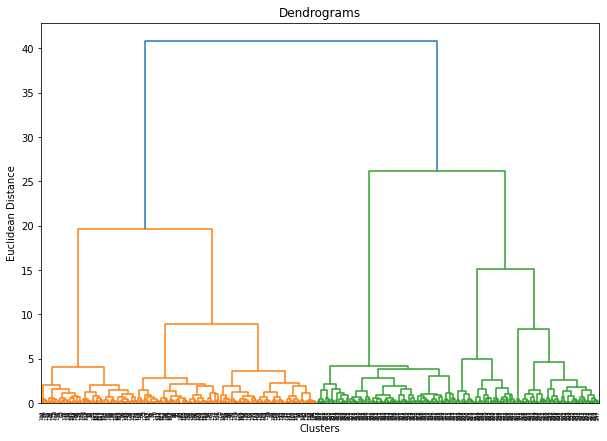

In [ ]:
#Hierarchial Plotting code
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import cut_tree
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df.iloc[:,0:3], method='ward'))
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
hierarchial_clusters = cluster.fit_predict(df.iloc[:,0:3])
hierarchial_clusters

array([3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1,
       3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1,
       1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [ ]:
df['Predicted_class_byHierarchial'] = hierarchial_clusters
df

X         Y         C  Class  Kmeans_Clusters  \
0    3.277701  0.814082  0.326574      1                0   
1    0.387577  0.176780  0.888046      1                2   
2    0.268546  0.582963  0.080981      1                2   
3    2.031145  0.244597  0.643921      1                0   
4    0.188677  0.461280  0.496633      1                2   
..        ...       ...       ...    ...              ...   
399  3.248655  2.297291  3.388138      3                1   
400  4.100000  5.100000  0.504558      4                3   
401  3.900000  4.900000  0.941634      4                3   
402  4.000000  5.000000  0.702123      4                3   
403  4.100000  5.100000  0.887645      4                3   

     Predicted_class_byHierarchial  
0                                3  
1                                1  
2                                1  
3                                1  
4                                1  
..                             ...  
399                              2  
400                              0  
401                              0  
402                              0  
403                              0  

[404 rows x 6 columns]

In [ ]:
data1 = df[df.Predicted_class_byHierarchial==0]
data2 = df[df.Predicted_class_byHierarchial==1]
data3 = df[df.Predicted_class_byHierarchial==2]
data4 = df[df.Predicted_class_byHierarchial==3]

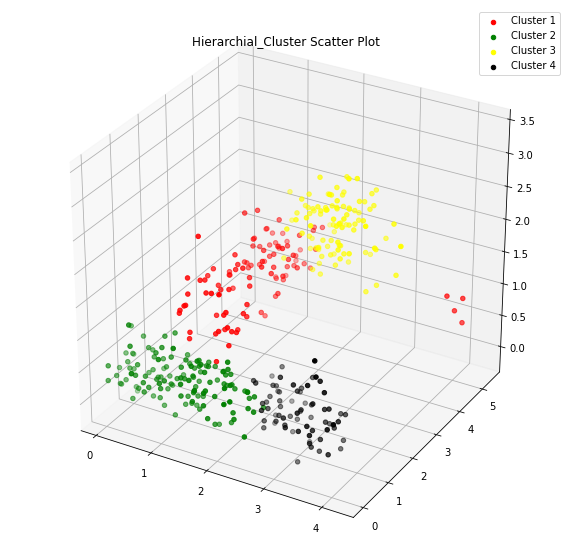

In [ ]:
#Plotting Hierarchial scatter plot
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X, data1.Y, data1.C, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X,data2.Y,data2.C,c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.X,data3.Y,data3.C,c ='yellow', label = 'Cluster 3')
kplot.scatter3D(data4.X,data4.Y,data4.C,c ='black', label = 'Cluster 4')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Hierarchial_Cluster Scatter Plot")
plt.show()

In [ ]:
#Masking the output cluster to avoide mismatching
from scipy.stats import mode 
labels = np.zeros_like(y)
for i in range(4):
    mask = (y == i)
    labels[mask] = mode(df.Class[mask])[0]

In [ ]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 3,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df.Class, labels)

0.9306930693069307

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(df.Class,labels)

array([[200,   0,   0],
       [ 24,  76,   0],
       [  0,   0, 100],
       [  0,   4,   0]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df.Class, labels, zero_division=0))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94       200
           2       0.95      0.76      0.84       100
           3       1.00      1.00      1.00       100
           4       0.00      0.00      0.00         4

    accuracy                           0.93       404
   macro avg       0.71      0.69      0.70       404
weighted avg       0.92      0.93      0.92       404



##DATA 3

In [ ]:
df = pd.read_csv('Data3.csv') #reading Data3

In [ ]:
df

Unnamed: 0        X1        X2        X3  Class
0             1  1.295428  0.050829 -0.385217      1
1             2  1.409178 -0.035191 -0.251980      1
2             3  1.096803  0.246365 -0.415011      1
3             4  1.463328  0.265354 -0.513488      1
4             5  1.603284  0.080577 -0.470257      1
..          ...       ...       ...       ...    ...
395         396  0.795695  0.209456  1.880609      4
396         397  0.653127 -0.703156  1.549448      4
397         398 -0.726249 -0.103244  0.694300      4
398         399  0.808596 -0.492640  1.649370      4
399         400  0.749291 -0.447840  0.863555      4

[400 rows x 5 columns]

In [ ]:
df = df.drop("Unnamed: 0",axis=1) #dropping unwanted column

In [ ]:
#Mapping data value and creating a new dataframes based on the class values

data1 = df[df.Class==1]
data2 = df[df.Class==2]
data3 = df[df.Class==3]
data4 = df[df.Class==4]

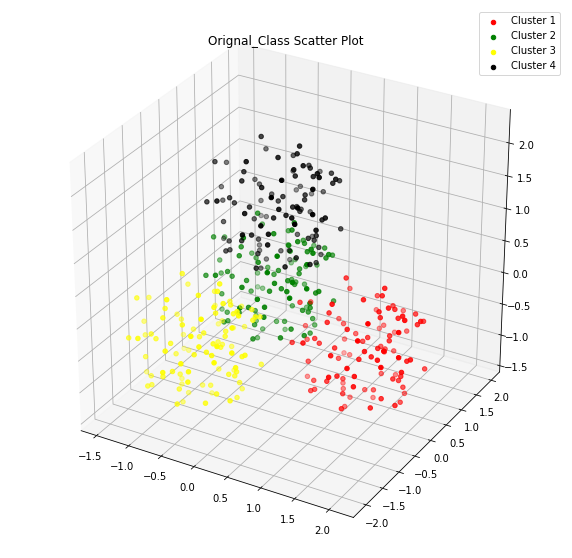

In [ ]:
#Plotting Orignal Class Scatter Plot

fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, data1.X3, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1,data2.X2,data2.X3,c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.X1,data3.X2,data3.X3,c ='yellow', label = 'Cluster 3')
kplot.scatter3D(data4.X1,data4.X2,data4.X3,c ='black', label = 'Cluster 4')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Orignal_Class Scatter Plot")
plt.show()

In [ ]:
#Kmeans clustering code

values = df[['X1','X2','X3' ]].values
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(values) 
    wcss.append(kmeans.inertia_)

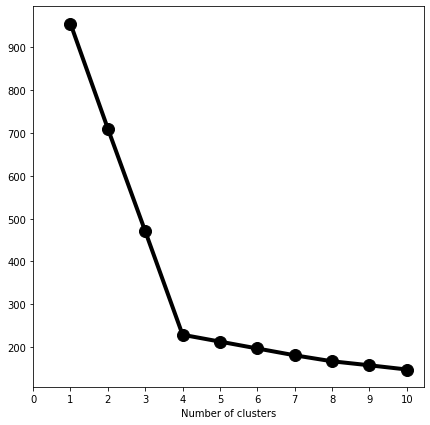

In [ ]:
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),wcss, linewidth=4, markersize=12,marker='o',color = 'black')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("")
plt.show()

In [ ]:
# finding the clusters based on input matrix "values"
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10)
y = model.fit_predict(values)
print(y)
y.shape

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


(400,)

In [ ]:
df['Kmeans_Cluster'] = y

In [ ]:
data1 = df[df.Kmeans_Cluster==0]
data2 = df[df.Kmeans_Cluster==1]
data3 = df[df.Kmeans_Cluster==2]
data4 = df[df.Kmeans_Cluster==3]

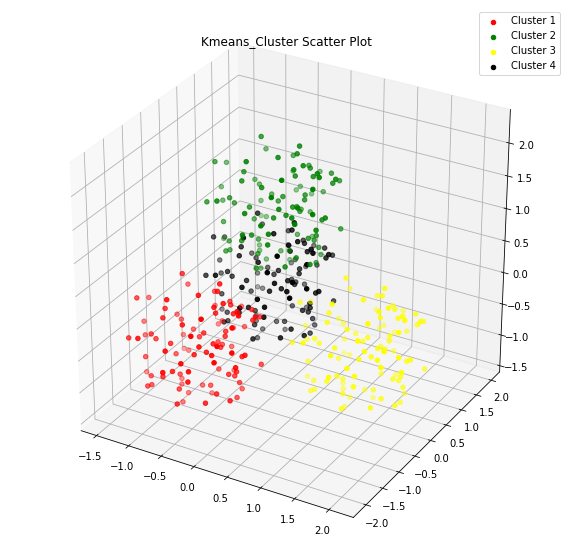

In [ ]:
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, data1.X3, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1,data2.X2,data2.X3,c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.X1,data3.X2,data3.X3,c ='yellow', label = 'Cluster 3')
kplot.scatter3D(data4.X1,data4.X2,data4.X3,c ='black', label = 'Cluster 4')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Kmeans_Cluster Scatter Plot")
plt.show()

In [ ]:
from scipy.stats import mode 
labels = np.zeros_like(y)
for i in range(4):
    mask = (y == i)
    labels[mask] = mode(df.Class[mask])[0]

In [ ]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df.Class, labels)

1.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df.Class, labels))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00       100

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [ ]:
df

X1        X2        X3  Class  Kmeans_Cluster
0    1.295428  0.050829 -0.385217      1               2
1    1.409178 -0.035191 -0.251980      1               2
2    1.096803  0.246365 -0.415011      1               2
3    1.463328  0.265354 -0.513488      1               2
4    1.603284  0.080577 -0.470257      1               2
..        ...       ...       ...    ...             ...
395  0.795695  0.209456  1.880609      4               1
396  0.653127 -0.703156  1.549448      4               1
397 -0.726249 -0.103244  0.694300      4               1
398  0.808596 -0.492640  1.649370      4               1
399  0.749291 -0.447840  0.863555      4               1

[400 rows x 5 columns]

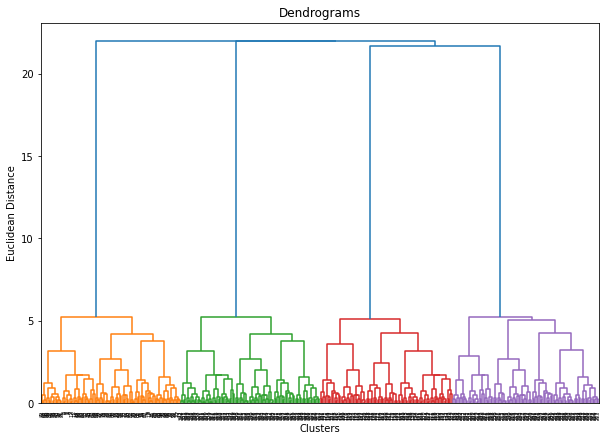

In [ ]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import cut_tree
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df.iloc[:,0:3], method='ward'))
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
hierarchial_clusters = cluster.fit_predict(df.iloc[:,0:3])
hierarchial_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [ ]:
df['Predicted_class_byHierarchial'] = hierarchial_clusters
df

X1        X2        X3  Class  Kmeans_Cluster  \
0    1.295428  0.050829 -0.385217      1               2   
1    1.409178 -0.035191 -0.251980      1               2   
2    1.096803  0.246365 -0.415011      1               2   
3    1.463328  0.265354 -0.513488      1               2   
4    1.603284  0.080577 -0.470257      1               2   
..        ...       ...       ...    ...             ...   
395  0.795695  0.209456  1.880609      4               1   
396  0.653127 -0.703156  1.549448      4               1   
397 -0.726249 -0.103244  0.694300      4               1   
398  0.808596 -0.492640  1.649370      4               1   
399  0.749291 -0.447840  0.863555      4               1   

     Predicted_class_byHierarchial  
0                                1  
1                                1  
2                                1  
3                                1  
4                                1  
..                             ...  
395                              2  
396                              2  
397                              2  
398                              2  
399                              2  

[400 rows x 6 columns]

In [ ]:
data1 = df[df.Predicted_class_byHierarchial==0]
data2 = df[df.Predicted_class_byHierarchial==1]
data3 = df[df.Predicted_class_byHierarchial==2]
data4 = df[df.Predicted_class_byHierarchial==3]

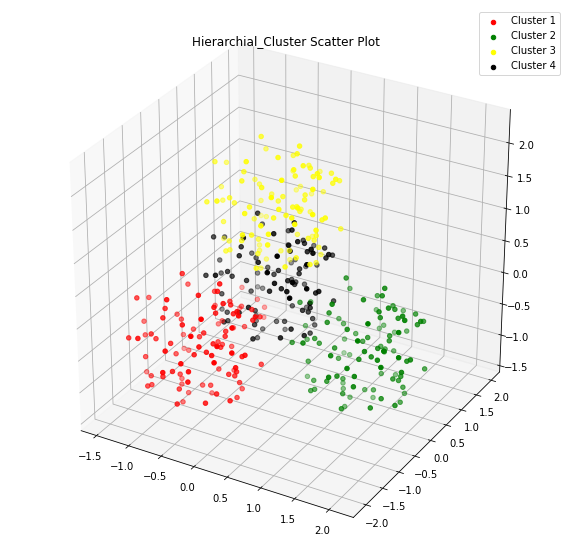

In [ ]:
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, data1.X3, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1,data2.X2,data2.X3,c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.X1,data3.X2,data3.X3,c ='yellow', label = 'Cluster 3')
kplot.scatter3D(data4.X1,data4.X2,data4.X3,c ='black', label = 'Cluster 4')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Hierarchial_Cluster Scatter Plot")
plt.show()

In [ ]:
from scipy.stats import mode 
labels = np.zeros_like(y)
for i in range(4):
    mask = (y == i)
    labels[mask] = mode(df.Class[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df.Class, labels)

1.0

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(df.Class,labels)

array([[100,   0,   0,   0],
       [  0, 100,   0,   0],
       [  0,   0, 100,   0],
       [  0,   0,   0, 100]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df.Class, labels, zero_division=0))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00       100

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



##DATA 4

In [ ]:
df = pd.read_csv('Data4.csv')

In [ ]:
df

Unnamed: 0       X1      X2       X3  Class
0             1 -0.45300 -0.8910  0.02300      1
1             2  0.65300 -0.8460  0.02110      1
2             3  0.39800  0.9130 -0.00139      1
3             4  0.09520  1.0500  0.00628      1
4             5  0.52400 -0.9410  0.03780      1
..          ...      ...     ...      ...    ...
995         996  0.01520  0.0531 -0.36100      2
996         997  0.05160  0.6910  0.87500      2
997         998 -0.00511  1.3900 -0.94700      2
998         999 -0.06710  0.7140  0.88100      2
999        1000 -0.05770  0.4280 -0.73000      2

[1000 rows x 5 columns]

In [ ]:
df = df.drop("Unnamed: 0",axis=1)

In [ ]:
data1 = df[df.Class==1]
data2 = df[df.Class==2]

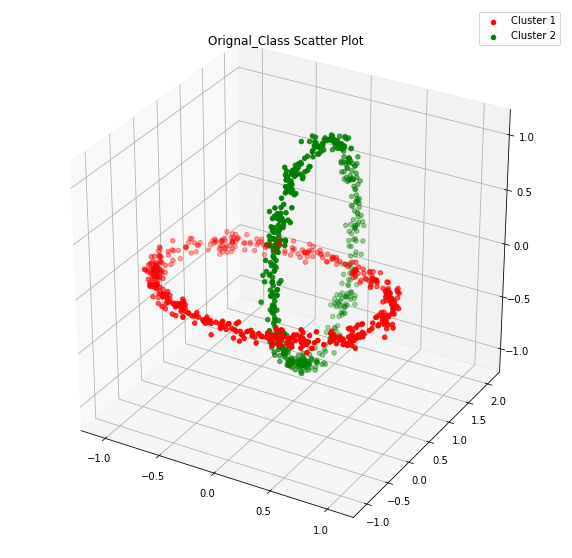

In [ ]:
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, data1.X3, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1,data2.X2,data2.X3,c ='green', label = 'Cluster 2')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Orignal_Class Scatter Plot")
plt.show()

In [ ]:
values = df[['X1','X2','X3' ]].values

wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(values) 
    wcss.append(kmeans.inertia_)

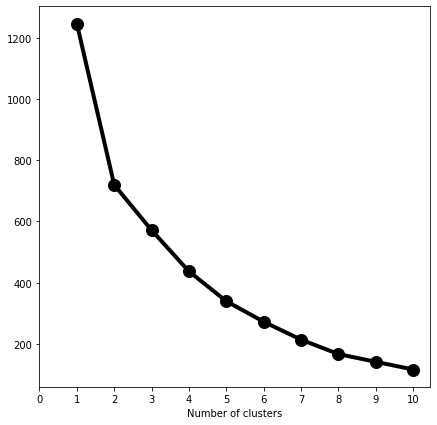

In [ ]:
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),wcss, linewidth=4, markersize=12,marker='o',color = 'black')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("")
plt.show()

In [ ]:
# finding the clusters based on input matrix "values"
model = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y = model.fit_predict(values)
print(y)
y.shape

[1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0
 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1
 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0
 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0
 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1
 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0
 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1
 0 0 0 1 1 0 1 1 0 1 1 1 

(1000,)

In [ ]:
df['Kmeans_Cluster'] = y

In [ ]:
data1 = df[df.Kmeans_Cluster==0]
data2 = df[df.Kmeans_Cluster==1]


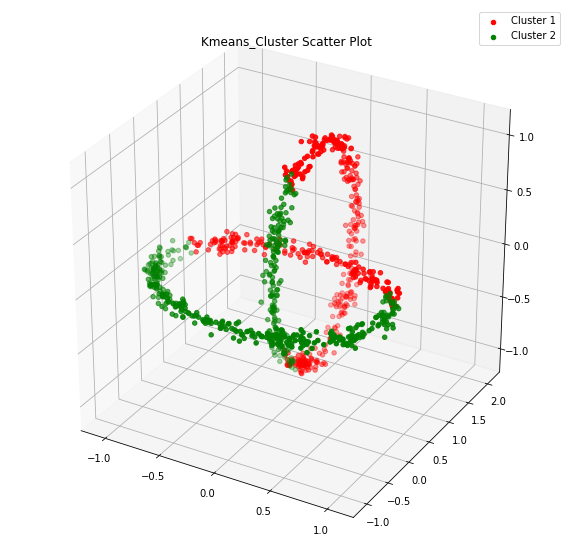

In [ ]:
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, data1.X3, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1,data2.X2,data2.X3,c ='green', label = 'Cluster 2')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Kmeans_Cluster Scatter Plot")
plt.show()

In [ ]:
from scipy.stats import mode 
labels = np.zeros_like(y)
for i in range(2):
    mask = (y == i)
    labels[mask] = mode(df.Class[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df.Class, labels)

0.653

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df.Class, labels))

              precision    recall  f1-score   support

           1       0.65      0.65      0.65       500
           2       0.65      0.65      0.65       500

    accuracy                           0.65      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.65      0.65      0.65      1000



In [ ]:
df

X1      X2       X3  Class  Kmeans_Cluster
0   -0.45300 -0.8910  0.02300      1               1
1    0.65300 -0.8460  0.02110      1               1
2    0.39800  0.9130 -0.00139      1               0
3    0.09520  1.0500  0.00628      1               0
4    0.52400 -0.9410  0.03780      1               1
..       ...     ...      ...    ...             ...
995  0.01520  0.0531 -0.36100      2               1
996  0.05160  0.6910  0.87500      2               0
997 -0.00511  1.3900 -0.94700      2               0
998 -0.06710  0.7140  0.88100      2               0
999 -0.05770  0.4280 -0.73000      2               0

[1000 rows x 5 columns]

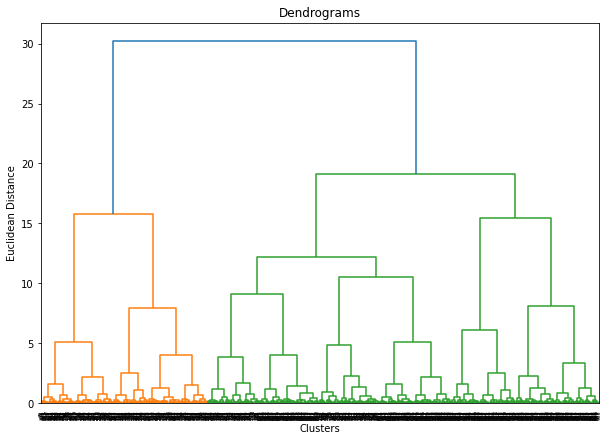

In [ ]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import cut_tree
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df.iloc[:,0:3], method='ward'))
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
hierarchial_clusters = cluster.fit_predict(df.iloc[:,0:3])
hierarchial_clusters

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [ ]:
df['Predicted_class_byHierarchial'] = hierarchial_clusters
df

X1      X2       X3  Class  Kmeans_Cluster  \
0   -0.45300 -0.8910  0.02300      1               1   
1    0.65300 -0.8460  0.02110      1               1   
2    0.39800  0.9130 -0.00139      1               0   
3    0.09520  1.0500  0.00628      1               0   
4    0.52400 -0.9410  0.03780      1               1   
..       ...     ...      ...    ...             ...   
995  0.01520  0.0531 -0.36100      2               1   
996  0.05160  0.6910  0.87500      2               0   
997 -0.00511  1.3900 -0.94700      2               0   
998 -0.06710  0.7140  0.88100      2               0   
999 -0.05770  0.4280 -0.73000      2               0   

     Predicted_class_byHierarchial  
0                                1  
1                                1  
2                                0  
3                                0  
4                                1  
..                             ...  
995                              0  
996                              0  
997                              0  
998                              0  
999                              0  

[1000 rows x 6 columns]

In [ ]:
data1 = df[df.Predicted_class_byHierarchial==0]
data2 = df[df.Predicted_class_byHierarchial==1]

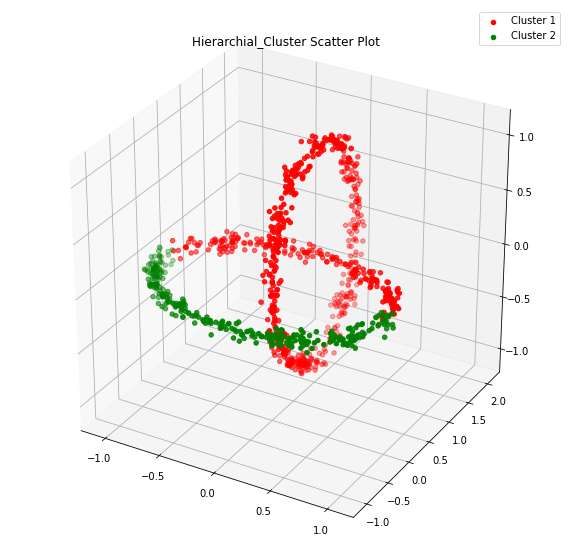

In [ ]:
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, data1.X3, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1,data2.X2,data2.X3,c ='green', label = 'Cluster 2')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Hierarchial_Cluster Scatter Plot")
plt.show()

In [ ]:
from scipy.stats import mode 
labels = np.zeros_like(y)
for i in range(4):
    mask = (y == i)
    labels[mask] = mode(df.Class[mask])[0]

In [ ]:
labels

array([1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df.Class, labels)

0.653

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(df.Class,labels)

array([[327, 173],
       [174, 326]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df.Class, labels, zero_division=0))

              precision    recall  f1-score   support

           1       0.65      0.65      0.65       500
           2       0.65      0.65      0.65       500

    accuracy                           0.65      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.65      0.65      0.65      1000



##DATA 5

In [ ]:
df = pd.read_csv('Data5.csv')

In [ ]:
df

Unnamed: 0         X1         X2         X3  Class
0             1  -4.822490 -50.402170   4.020861      1
1             2 -44.460120  20.964670 -11.492060      1
2             3  50.001020   0.780748   9.134460      1
3             4 -41.699080 -22.310060  16.314120      1
4             5   4.425242  -4.666664  50.223740      1
..          ...        ...        ...        ...    ...
795         796  -1.531027   0.681636   0.543271      2
796         797   0.500754  -1.848209   0.605654      2
797         798   1.089574  -0.246493  -3.355758      2
798         799  -1.907717   4.964502   2.098423      2
799         800   3.415463   4.529521  -1.617736      2

[800 rows x 5 columns]

In [ ]:
df = df.drop("Unnamed: 0",axis=1)

In [ ]:
data1 = df[df.Class==1]
data2 = df[df.Class==2]

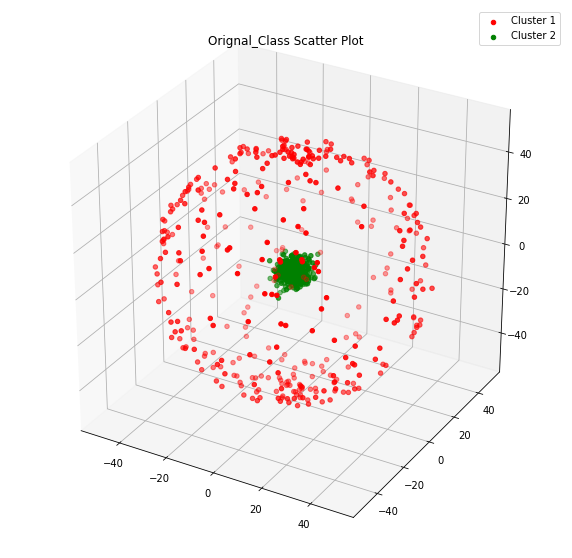

In [ ]:
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, data1.X3, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1,data2.X2,data2.X3,c ='green', label = 'Cluster 2')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Orignal_Class Scatter Plot")
plt.show()

In [ ]:
values = df[['X1','X2','X3' ]].values

wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(values) 
    wcss.append(kmeans.inertia_)

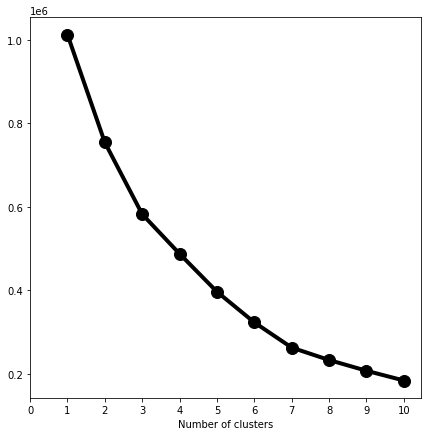

In [ ]:
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),wcss, linewidth=4, markersize=12,marker='o',color = 'black')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("")
plt.show()

In [ ]:
# finding the clusters based on input matrix "values"
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y = model.fit_predict(values)
print(y)
y.shape

[2 0 0 2 2 0 2 0 0 2 2 2 1 2 2 0 0 2 2 1 1 2 2 1 2 0 2 2 2 1 0 1 2 2 2 2 1
 2 2 2 2 2 0 1 1 0 2 1 0 0 1 1 1 1 2 1 1 1 2 0 0 2 0 1 1 0 2 1 1 1 0 2 1 2
 0 1 2 1 2 1 2 0 1 1 1 2 2 0 1 2 0 2 2 0 0 1 0 0 2 2 2 2 1 0 0 2 2 0 2 0 0
 2 1 0 1 1 2 2 0 2 0 1 0 1 0 0 2 2 2 2 0 2 2 2 1 0 2 1 2 2 1 0 0 1 0 1 0 2
 1 1 1 2 1 1 1 2 0 1 0 1 1 0 2 1 1 0 2 2 1 2 2 2 1 1 1 2 2 1 2 1 1 0 1 2 2
 0 2 2 2 1 0 2 2 0 0 2 1 2 1 1 1 0 2 1 1 1 0 1 1 2 1 0 2 2 0 1 1 0 2 0 1 2
 0 1 2 1 1 1 1 2 2 0 2 2 2 0 1 1 0 1 0 1 2 1 0 1 2 1 2 2 2 2 0 1 2 0 2 0 0
 2 1 1 1 0 1 1 1 2 0 2 2 1 2 2 2 1 1 0 2 1 1 1 0 1 1 2 2 0 2 2 0 2 0 1 0 2
 2 1 1 2 2 1 1 0 1 1 1 2 1 0 2 1 2 2 2 2 2 2 1 2 1 2 0 0 0 1 2 0 2 2 2 0 2
 0 2 0 1 1 1 2 0 1 0 0 2 1 1 0 2 0 2 1 1 2 2 2 2 1 2 2 1 1 2 0 1 0 2 2 0 1
 2 1 2 2 1 2 0 0 0 0 1 2 0 1 0 2 0 2 2 0 1 1 1 1 2 0 1 0 2 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

(800,)

In [ ]:
df['Kmeans_Cluster'] = y

In [ ]:
data1 = df[df.Kmeans_Cluster==0]
data2 = df[df.Kmeans_Cluster==1]
data3 = df[df.Kmeans_Cluster==2]

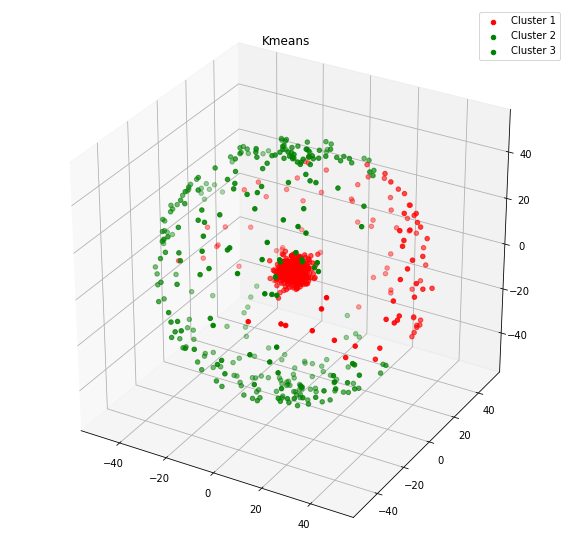

In [ ]:
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, data1.X3, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1,data2.X2,data2.X3,c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.X1,data3.X2,data3.X3,c ='green', label = 'Cluster 3')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Kmeans_Cluster Scatter Plot")
plt.show()

In [ ]:
from scipy.stats import mode 
labels = np.zeros_like(y)
for i in range(3):
    mask = (y == i)
    labels[mask] = mode(df.Class[mask])[0]

In [ ]:
labels

array([1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df.Class, labels)

0.87125

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df.Class, labels))

              precision    recall  f1-score   support

           1       1.00      0.74      0.85       400
           2       0.80      1.00      0.89       400

    accuracy                           0.87       800
   macro avg       0.90      0.87      0.87       800
weighted avg       0.90      0.87      0.87       800



In [ ]:
df

X1         X2         X3  Class  Kmeans_Cluster
0    -4.822490 -50.402170   4.020861      1               2
1   -44.460120  20.964670 -11.492060      1               0
2    50.001020   0.780748   9.134460      1               0
3   -41.699080 -22.310060  16.314120      1               2
4     4.425242  -4.666664  50.223740      1               2
..         ...        ...        ...    ...             ...
795  -1.531027   0.681636   0.543271      2               0
796   0.500754  -1.848209   0.605654      2               0
797   1.089574  -0.246493  -3.355758      2               0
798  -1.907717   4.964502   2.098423      2               0
799   3.415463   4.529521  -1.617736      2               0

[800 rows x 5 columns]

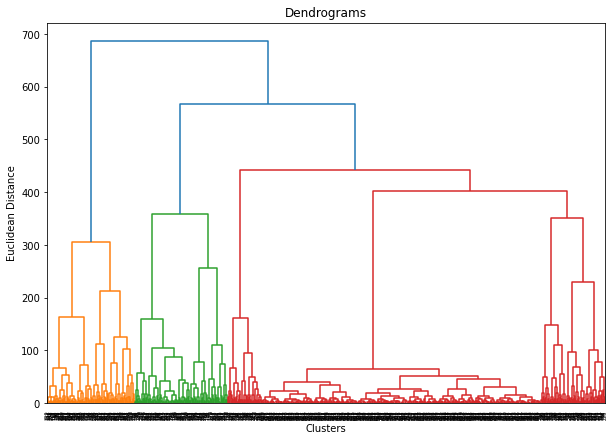

In [ ]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import cut_tree
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df.iloc[:,0:3], method='ward'))
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hierarchial_clusters = cluster.fit_predict(df.iloc[:,0:3])
hierarchial_clusters

array([1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0, 2, 0, 1, 1, 0,
       0, 1, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2,
       2, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2,
       1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0,
       2, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 1,
       1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2,
       0, 1, 2, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 2,
       1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 2, 1, 1, 2, 1, 0, 0,
       0, 1, 2, 1, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 2,
       2, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2,

In [ ]:
df['Predicted_class_byHierarchial'] = hierarchial_clusters
df

X1         X2         X3  Class  Kmeans_Cluster  \
0    -4.822490 -50.402170   4.020861      1               2   
1   -44.460120  20.964670 -11.492060      1               0   
2    50.001020   0.780748   9.134460      1               0   
3   -41.699080 -22.310060  16.314120      1               2   
4     4.425242  -4.666664  50.223740      1               2   
..         ...        ...        ...    ...             ...   
795  -1.531027   0.681636   0.543271      2               0   
796   0.500754  -1.848209   0.605654      2               0   
797   1.089574  -0.246493  -3.355758      2               0   
798  -1.907717   4.964502   2.098423      2               0   
799   3.415463   4.529521  -1.617736      2               0   

     Predicted_class_byHierarchial  
0                                1  
1                                0  
2                                2  
3                                0  
4                                2  
..                             ...  
795                              0  
796                              0  
797                              0  
798                              0  
799                              0  

[800 rows x 6 columns]

In [ ]:
data1 = df[df.Predicted_class_byHierarchial==0]
data2 = df[df.Predicted_class_byHierarchial==1]
data3 = df[df.Predicted_class_byHierarchial==2]

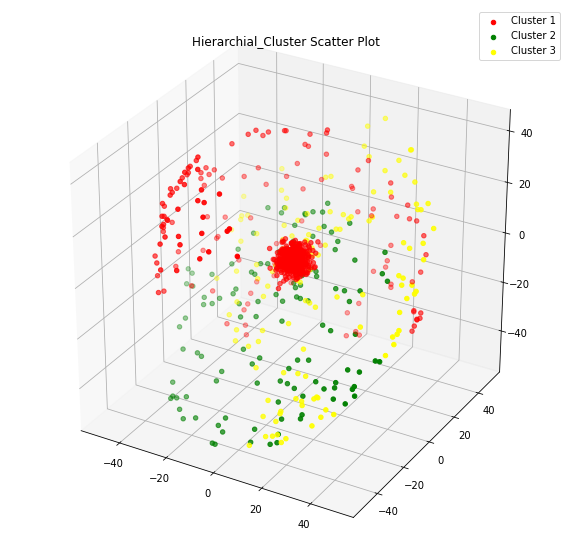

In [ ]:
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, data1.X3, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1,data2.X2,data2.X2,c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.X1,data3.X2,data3.X2,c ='yellow', label = 'Cluster 3')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Hierarchial_Cluster Scatter Plot")
plt.show()

In [ ]:
from scipy.stats import mode 
labels = np.zeros_like(y)
for i in range(4):
    mask = (y == i)
    labels[mask] = mode(df.Class[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df.Class, labels)

0.87125

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(df.Class,labels)

array([[297, 103],
       [  0, 400]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df.Class, labels, zero_division=0))

              precision    recall  f1-score   support

           1       1.00      0.74      0.85       400
           2       0.80      1.00      0.89       400

    accuracy                           0.87       800
   macro avg       0.90      0.87      0.87       800
weighted avg       0.90      0.87      0.87       800



##DATA 6

In [ ]:
df = pd.read_csv('Data6.csv')

In [ ]:
df

Unnamed: 0        X1        X2  Class
0              1  1.388261  2.076096      1
1              2  2.177247  3.102304      1
2              3  0.378645  5.307610      1
3              4  3.681732  1.622681      1
4              5  2.462861  2.777897      1
...          ...       ...       ...    ...
4091        4092  0.909687  0.375763      2
4092        4093  2.698381  0.511262      2
4093        4094  1.078797  1.526153      2
4094        4095  1.974889 -0.649343      2
4095        4096 -0.127192 -0.763974      2

[4096 rows x 4 columns]

In [ ]:
df = df.drop("Unnamed: 0",axis=1)

In [ ]:
data1 = df[df.Class==1]
data2 = df[df.Class==2]

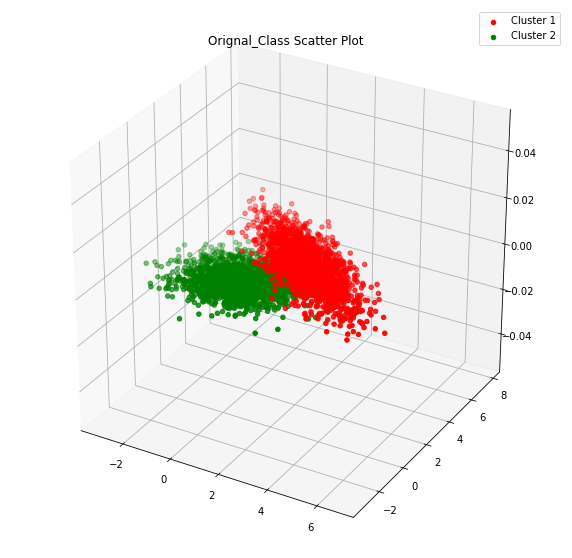

In [ ]:
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1,data2.X2,c ='green', label = 'Cluster 2')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Orignal_Class Scatter Plot")
plt.show()

In [ ]:
values = df[['X1','X2']].values

wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(values) 
    wcss.append(kmeans.inertia_)

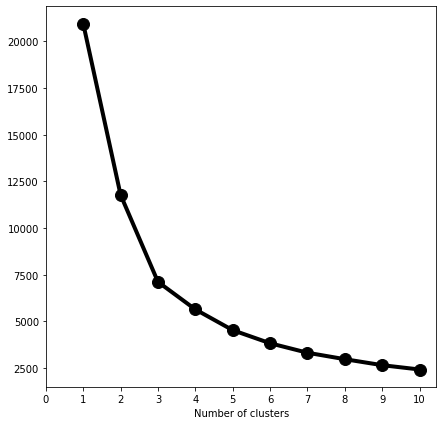

In [ ]:
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),wcss, linewidth=4, markersize=12,marker='o',color = 'black')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("")
plt.show()

In [ ]:
# finding the clusters based on input matrix "values"
model = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y = model.fit_predict(values)
print(y)
y.shape

[1 1 1 ... 0 0 0]


(4096,)

In [ ]:
df['Kmeans_Cluster'] = y

In [ ]:
df

X1        X2  Class  Kmeans_Cluster
0     1.388261  2.076096      1               1
1     2.177247  3.102304      1               1
2     0.378645  5.307610      1               1
3     3.681732  1.622681      1               1
4     2.462861  2.777897      1               1
...        ...       ...    ...             ...
4091  0.909687  0.375763      2               0
4092  2.698381  0.511262      2               0
4093  1.078797  1.526153      2               0
4094  1.974889 -0.649343      2               0
4095 -0.127192 -0.763974      2               0

[4096 rows x 4 columns]

In [ ]:
data1 = df[df.Kmeans_Cluster==0]
data2 = df[df.Kmeans_Cluster==1]
# data3 = df[df.Kmeans_Cluster==2]

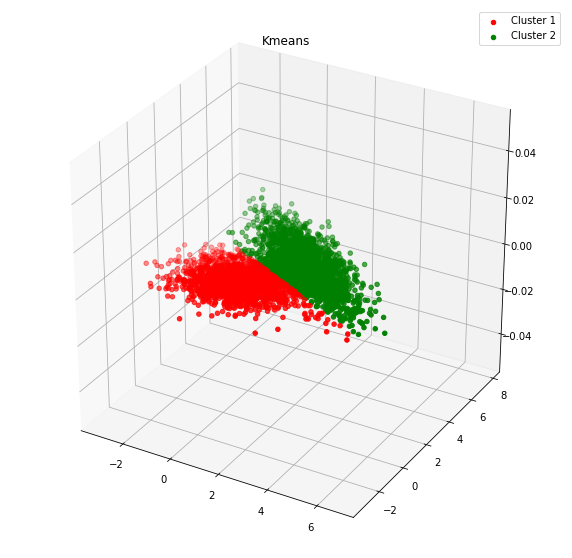

In [ ]:
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1,data2.X2,c ='green', label = 'Cluster 2')
# kplot.scatter3D(data3.X1,data3.X2,c ='Black', label = 'Cluster 3')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Kmeans")
plt.show()

In [ ]:
from scipy.stats import mode 
labels = np.zeros_like(y)
for i in range(2):
    mask = (y == i)
    labels[mask] = mode(df.Class[mask])[0]

In [ ]:
labels

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df.Class, labels)

0.951416015625

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df.Class, labels))

              precision    recall  f1-score   support

           1       0.93      0.98      0.95      2048
           2       0.98      0.93      0.95      2048

    accuracy                           0.95      4096
   macro avg       0.95      0.95      0.95      4096
weighted avg       0.95      0.95      0.95      4096



In [ ]:
df

X1        X2  Class  Kmeans_Cluster
0     1.388261  2.076096      1               1
1     2.177247  3.102304      1               1
2     0.378645  5.307610      1               1
3     3.681732  1.622681      1               1
4     2.462861  2.777897      1               1
...        ...       ...    ...             ...
4091  0.909687  0.375763      2               0
4092  2.698381  0.511262      2               0
4093  1.078797  1.526153      2               0
4094  1.974889 -0.649343      2               0
4095 -0.127192 -0.763974      2               0

[4096 rows x 4 columns]

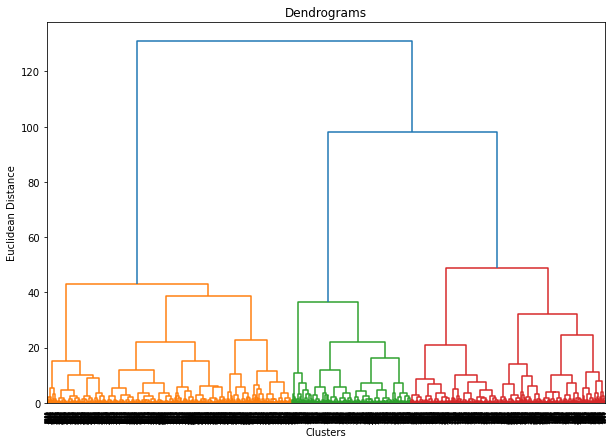

In [ ]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import cut_tree
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df.iloc[:,0:2], method='ward'))
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
hierarchial_clusters = cluster.fit_predict(df.iloc[:,0:2])
hierarchial_clusters

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
df['Predicted_class_byHierarchial'] = hierarchial_clusters
df

X1        X2  Class  Kmeans_Cluster  Predicted_class_byHierarchial
0     1.388261  2.076096      1               1                              0
1     2.177247  3.102304      1               1                              0
2     0.378645  5.307610      1               1                              0
3     3.681732  1.622681      1               1                              0
4     2.462861  2.777897      1               1                              0
...        ...       ...    ...             ...                            ...
4091  0.909687  0.375763      2               0                              1
4092  2.698381  0.511262      2               0                              1
4093  1.078797  1.526153      2               0                              1
4094  1.974889 -0.649343      2               0                              1
4095 -0.127192 -0.763974      2               0                              1

[4096 rows x 5 columns]

In [ ]:
data1 = df[df.Predicted_class_byHierarchial==0]
data2 = df[df.Predicted_class_byHierarchial==1]

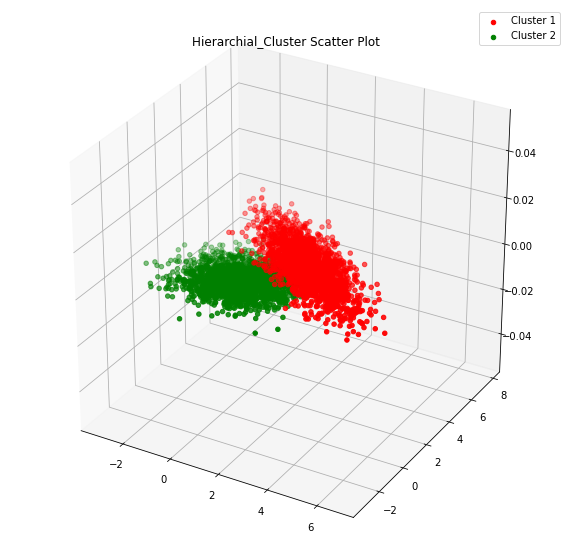

In [ ]:
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1,data2.X2,c ='green', label = 'Cluster 2')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Hierarchial_Cluster Scatter Plot")
plt.show()

In [ ]:
from scipy.stats import mode 
labels = np.zeros_like(y)
for i in range(4):
    mask = (y == i)
    labels[mask] = mode(df.Class[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df.Class, labels)

0.951416015625

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(df.Class,labels)

array([[2002,   46],
       [ 153, 1895]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df.Class, labels, zero_division=0))

              precision    recall  f1-score   support

           1       0.93      0.98      0.95      2048
           2       0.98      0.93      0.95      2048

    accuracy                           0.95      4096
   macro avg       0.95      0.95      0.95      4096
weighted avg       0.95      0.95      0.95      4096



##DATA 7

In [ ]:
df = pd.read_csv('Data7.csv')

In [ ]:
df

Unnamed: 0        X1        X2  Class
0             1 -3.000000 -3.000000      5
1             2 -3.000000  3.000000      4
2             3  3.000000 -3.000000      6
3             4  3.000000  3.000000      3
4             5 -0.417091  0.114782      1
..          ...       ...       ...    ...
765         766 -1.604434 -1.118861      2
766         767 -3.050000 -3.050000      5
767         768 -3.050000  2.950000      4
768         769  2.950000 -3.050000      6
769         770  2.950000  2.950000      3

[770 rows x 4 columns]

In [ ]:
df = df.drop("Unnamed: 0",axis=1)

In [ ]:
data1 = df[df.Class==1]
data2 = df[df.Class==2]
data3 = df[df.Class==3]
data4 = df[df.Class==4]
data5 = df[df.Class==5]
data6 = df[df.Class==6]

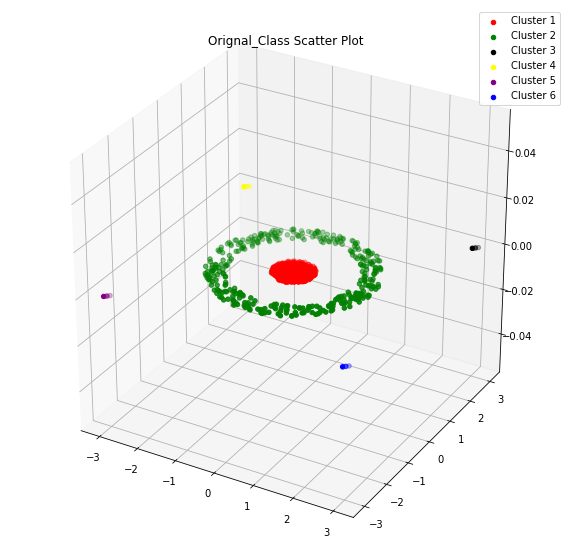

In [ ]:
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1,data2.X2,c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.X1,data3.X2,c ='Black', label = 'Cluster 3')
kplot.scatter3D(data4.X1,data4.X2,c ='yellow', label = 'Cluster 4')
kplot.scatter3D(data5.X1,data5.X2,c ='purple', label = 'Cluster 5')
kplot.scatter3D(data6.X1,data6.X2,c ='blue', label = 'Cluster 6')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Orignal_Class Scatter Plot")
plt.show()

In [ ]:
values = df[['X1','X2']].values

wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(values) 
    wcss.append(kmeans.inertia_)

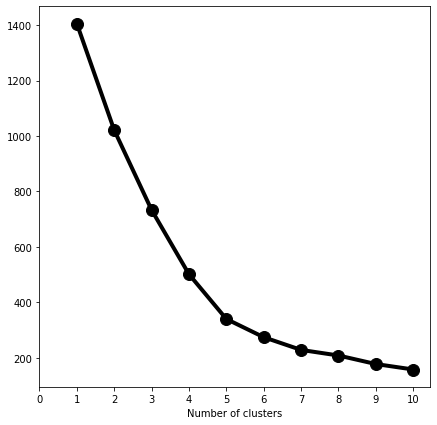

In [ ]:
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),wcss, linewidth=4, markersize=12,marker='o',color = 'black')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("")
plt.show()

In [ ]:
# finding the clusters based on input matrix "values"
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y = model.fit_predict(values)
print(y)
y.shape

[2 4 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 4 3 1 2 4 2 3
 2 4 2 3 2 3 2 3 4 3 4 2 4 2 3 4 4 4 1 4 3 4 4 1 4 3 2 4 4 3 3 4 2 4 1 2 4
 3 2 1 2 3 3 4 1 3 1 3 1 3 4 4 1 1 1 2 3 2 3 2 1 3 4 2 1 3 1 1 2 3 1 4 4 4
 2 4 4 3 4 4 4 4 1 4 3 4 

(770,)

In [ ]:
df['Kmeans_Cluster'] = y

In [ ]:
data1 = df[df.Kmeans_Cluster==0]
data2 = df[df.Kmeans_Cluster==1]
data3 = df[df.Kmeans_Cluster==2]
data4 = df[df.Kmeans_Cluster==3]
data5 = df[df.Kmeans_Cluster==4]
# data6 = df[df.Kmeans_Cluster==5]

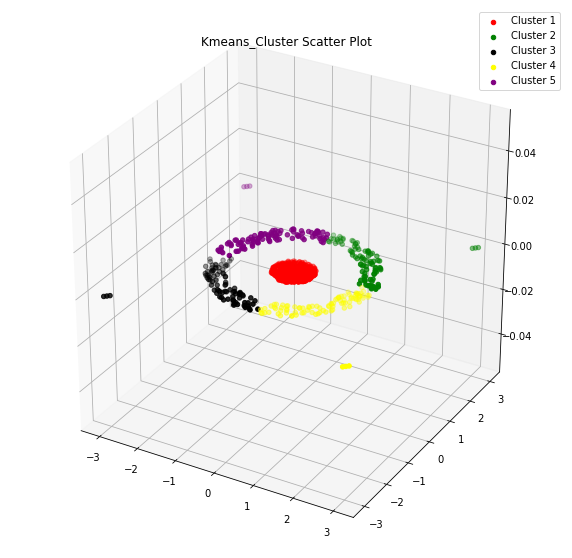

In [ ]:
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1,data2.X2,c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.X1,data3.X2,c ='Black', label = 'Cluster 3')
kplot.scatter3D(data4.X1,data4.X2,c ='yellow', label = 'Cluster 4')
kplot.scatter3D(data5.X1,data5.X2,c ='purple', label = 'Cluster 5')
# kplot.scatter3D(data6.X1,data6.X2,c ='blue', label = 'Cluster 6')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Kmeans_Cluster Scatter Plot")
plt.show()

In [ ]:
from scipy.stats import mode 
labels = np.zeros_like(y)
for i in range(5):
    mask = (y == i)
    labels[mask] = mode(df.Class[mask])[0]

In [ ]:
labels

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df.Class, labels)

0.9844155844155844

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df.Class, labels))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       395
           2       0.97      1.00      0.98       363
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3

    accuracy                           0.98       770
   macro avg       0.33      0.33      0.33       770
weighted avg       0.97      0.98      0.98       770



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df

X1        X2  Class  Kmeans_Cluster
0   -3.000000 -3.000000      5               2
1   -3.000000  3.000000      4               4
2    3.000000 -3.000000      6               3
3    3.000000  3.000000      3               1
4   -0.417091  0.114782      1               0
..        ...       ...    ...             ...
765 -1.604434 -1.118861      2               2
766 -3.050000 -3.050000      5               2
767 -3.050000  2.950000      4               4
768  2.950000 -3.050000      6               3
769  2.950000  2.950000      3               1

[770 rows x 4 columns]

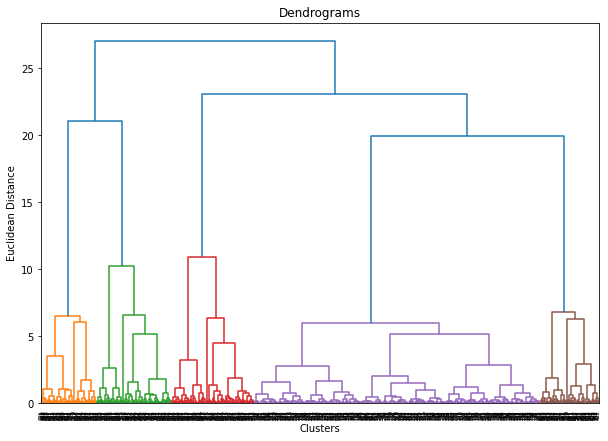

In [ ]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import cut_tree
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df.iloc[:,0:2], method='ward'))
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
hierarchial_clusters = cluster.fit_predict(df.iloc[:,0:2])
hierarchial_clusters

array([2, 0, 1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [ ]:
df['Predicted_class_byHierarchial'] = hierarchial_clusters
df

X1        X2  Class  Kmeans_Cluster  Predicted_class_byHierarchial
0   -3.000000 -3.000000      5               2                              2
1   -3.000000  3.000000      4               4                              0
2    3.000000 -3.000000      6               3                              1
3    3.000000  3.000000      3               1                              3
4   -0.417091  0.114782      1               0                              4
..        ...       ...    ...             ...                            ...
765 -1.604434 -1.118861      2               2                              2
766 -3.050000 -3.050000      5               2                              2
767 -3.050000  2.950000      4               4                              0
768  2.950000 -3.050000      6               3                              1
769  2.950000  2.950000      3               1                              3

[770 rows x 5 columns]

In [ ]:
data1 = df[df.Predicted_class_byHierarchial==0]
data2 = df[df.Predicted_class_byHierarchial==1]
data3 = df[df.Predicted_class_byHierarchial==2]
data4 = df[df.Predicted_class_byHierarchial==3]
data5 = df[df.Predicted_class_byHierarchial==4]

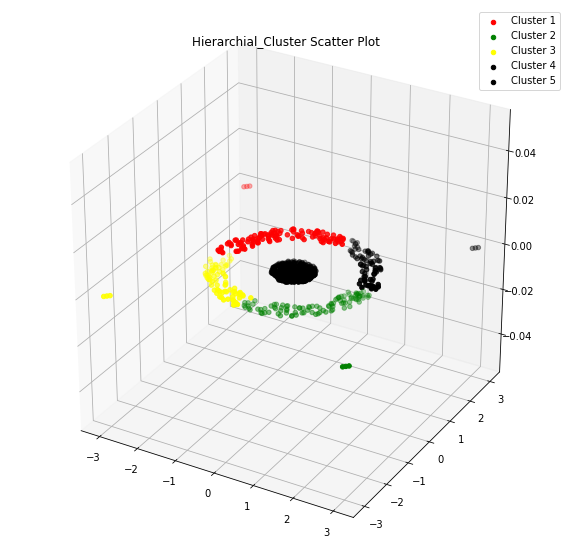

In [ ]:
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1,data2.X2,c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.X1,data3.X2,c ='yellow', label = 'Cluster 3')
kplot.scatter3D(data4.X1,data4.X2,c ='black', label = 'Cluster 4')
kplot.scatter3D(data5.X1,data5.X2,c ='black', label = 'Cluster 5')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Hierarchial_Cluster Scatter Plot")
plt.show()

In [ ]:
from scipy.stats import mode 
labels = np.zeros_like(y)
for i in range(4):
    mask = (y == i)
    labels[mask] = mode(df.Class[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df.Class, labels)

0.8597402597402597

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(df.Class,labels)

array([[  0, 395,   0],
       [ 96,   0, 267],
       [  0,   0,   3],
       [  3,   0,   0],
       [  0,   0,   3],
       [  0,   0,   3]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df.Class, labels, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00       395
           2       0.97      0.74      0.84       363
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3

    accuracy                           0.86       770
   macro avg       0.28      0.25      0.26       770
weighted avg       0.97      0.86      0.91       770



##DATA 8

In [ ]:
df = pd.read_csv('Data8.csv')

In [ ]:
df

Unnamed: 0        X1        X2       X3  Class
0              1  0.000000  0.000000  1.00000      1
1              2  0.000000  0.052336  0.99863      1
2              3  0.049774  0.016173  0.99863      1
3              4  0.030762 -0.042341  0.99863      1
4              5 -0.030762 -0.042341  0.99863      1
...          ...       ...       ...      ...    ...
3997        3998  0.049774 -0.016173 -0.99863      1
3998        3999  0.000000 -0.052336 -0.99863      1
3999        4000 -0.049774 -0.016173 -0.99863      1
4000        4001 -0.030762  0.042341 -0.99863      1
4001        4002  0.000000  0.000000 -1.00000      1

[4002 rows x 5 columns]

In [ ]:
df = df.drop("Unnamed: 0",axis=1)

In [ ]:
data1 = df[df.Class==1]

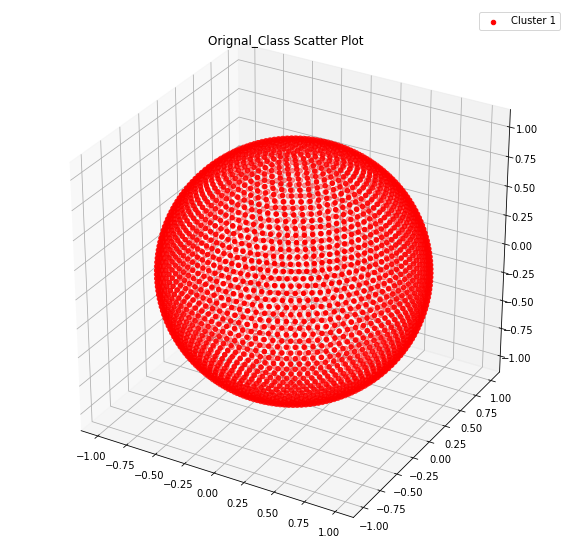

In [ ]:
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2,data1.X3, c='red', label = 'Cluster 1')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Orignal_Class Scatter Plot")
plt.show()

In [ ]:
values = df[['X1','X2','X3' ]].values

wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(values) 
    wcss.append(kmeans.inertia_)

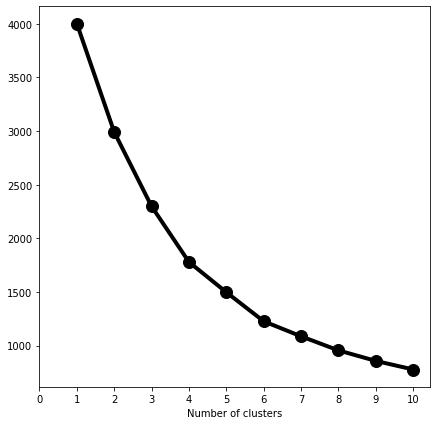

In [ ]:
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),wcss, linewidth=4, markersize=12,marker='o',color = 'black')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("")
plt.show()

In [ ]:
# finding the clusters based on input matrix "values"
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y = model.fit_predict(values)
print(y)
y.shape

[0 0 0 ... 3 2 3]


(4002,)

In [ ]:
df['Kmeans_Cluster'] = y

In [ ]:
data1 = df[df.Kmeans_Cluster==0]
data2 = df[df.Kmeans_Cluster==1]
data3 = df[df.Kmeans_Cluster==2]
data4 = df[df.Kmeans_Cluster==3]
# data5 = df[df.Kmeans_Cluster==4]
# data6 = df[df.Kmeans_Cluster==5]

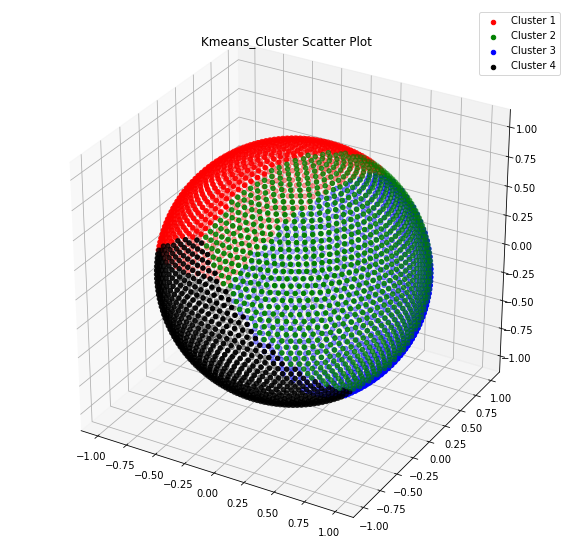

In [ ]:
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, data1.X3, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1,data2.X2,data2.X3,c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.X1,data3.X2,data3.X3,c ='blue', label = 'Cluster 3')
kplot.scatter3D(data4.X1,data4.X2,data4.X3,c ='black', label = 'Cluster 4')
# kplot.scatter3D(data3.X1,data3.X2,data3.X3,c ='purple', label = 'Cluster 5')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Kmeans_Cluster Scatter Plot")
plt.show()

In [ ]:
from scipy.stats import mode 
labels = np.zeros_like(y)
for i in range(4):
    mask = (y == i)
    labels[mask] = mode(df.Class[mask])[0]

In [ ]:
labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df.Class, labels)

1.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df.Class, labels))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4002

    accuracy                           1.00      4002
   macro avg       1.00      1.00      1.00      4002
weighted avg       1.00      1.00      1.00      4002



In [ ]:
df

X1        X2       X3  Class  Kmeans_Cluster
0     0.000000  0.000000  1.00000      1               0
1     0.000000  0.052336  0.99863      1               0
2     0.049774  0.016173  0.99863      1               0
3     0.030762 -0.042341  0.99863      1               0
4    -0.030762 -0.042341  0.99863      1               0
...        ...       ...      ...    ...             ...
3997  0.049774 -0.016173 -0.99863      1               3
3998  0.000000 -0.052336 -0.99863      1               3
3999 -0.049774 -0.016173 -0.99863      1               3
4000 -0.030762  0.042341 -0.99863      1               2
4001  0.000000  0.000000 -1.00000      1               3

[4002 rows x 5 columns]

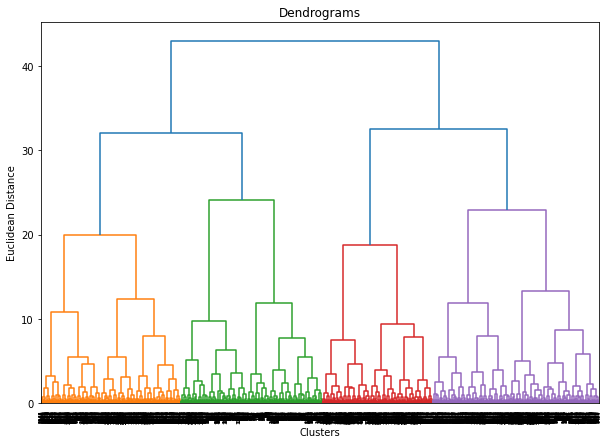

In [ ]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import cut_tree
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df.iloc[:,0:3], method='ward'))
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
hierarchial_clusters = cluster.fit_predict(df.iloc[:,0:3])
hierarchial_clusters

array([0, 0, 0, ..., 2, 1, 2])

In [ ]:
df['Predicted_class_byHierarchial'] = hierarchial_clusters
df

X1        X2       X3  Class  Kmeans_Cluster  \
0     0.000000  0.000000  1.00000      1               0   
1     0.000000  0.052336  0.99863      1               0   
2     0.049774  0.016173  0.99863      1               0   
3     0.030762 -0.042341  0.99863      1               0   
4    -0.030762 -0.042341  0.99863      1               0   
...        ...       ...      ...    ...             ...   
3997  0.049774 -0.016173 -0.99863      1               3   
3998  0.000000 -0.052336 -0.99863      1               3   
3999 -0.049774 -0.016173 -0.99863      1               3   
4000 -0.030762  0.042341 -0.99863      1               2   
4001  0.000000  0.000000 -1.00000      1               3   

      Predicted_class_byHierarchial  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0  
...                             ...  
3997                              2  
3998                              2  
3999                              2  
4000                              1  
4001                              2  

[4002 rows x 6 columns]

In [ ]:
data1 = df[df.Predicted_class_byHierarchial==0]
data2 = df[df.Predicted_class_byHierarchial==1]
data3 = df[df.Predicted_class_byHierarchial==2]
data4 = df[df.Predicted_class_byHierarchial==3]

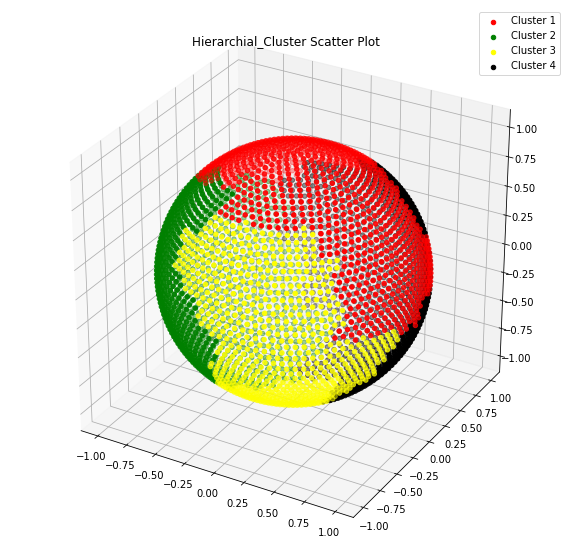

In [ ]:
fig = plt.figure(figsize = (10,10))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 1000)
yline = np.linspace(0, 5, 1000)
zline = np.linspace(0,5, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.X1, data1.X2, data1.X3, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.X1,data2.X2,data2.X3,c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.X1,data3.X2,data3.X3,c ='yellow', label = 'Cluster 3')
kplot.scatter3D(data4.X1,data4.X2,data4.X3,c ='black', label = 'Cluster 4')
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'indigo', s = 20)
plt.legend()
plt.title("Hierarchial_Cluster Scatter Plot")
plt.show()

In [ ]:
from scipy.stats import mode 
labels = np.zeros_like(y)
for i in range(4):
    mask = (y == i)
    labels[mask] = mode(df.Class[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df.Class, labels)

1.0

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(df.Class,labels)

array([[4002]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df.Class, labels, zero_division=0))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4002

    accuracy                           1.00      4002
   macro avg       1.00      1.00      1.00      4002
weighted avg       1.00      1.00      1.00      4002

